In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
workdir_path = '/content/drive/My Drive/exercicio2 09112019' #MODIFICAR!!! #Caminho para o seu workspace
os.chdir(workdir_path)

In [4]:
ls

cookie.jpg
cookie_reviews.csv
factual_tripadvisor_restaurant_data_all_100_reviews.json
Reviews.csv
winemag-data-130k-v2.csv
winemag-data-130k-v2.json
winemag-data_first150k.csv


In [5]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
 
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec

Using TensorFlow backend.


In [0]:
#from sklearn.preprocessing import Imputer

In [0]:
##LOADING THE DATASET¶


In [0]:
rev_frame=pd.read_csv('Reviews.csv')


In [8]:
df=rev_frame.copy()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [0]:
#choose coments that others users find it that was a Helpfull coment

In [11]:
len(df[df['HelpfulnessDenominator']>6])

42265

In [12]:
df=df[df['HelpfulnessDenominator']>3][['Text','Score']]
df.head(2)

,Text,Score
11,One of my boys needed to lose some weight and ...,5
14,The Strawberry Twizzlers are my guilty pleasur...,5


In [0]:
df['review']=df['Text']
df['rating']=df['Score']
df.drop(['Text','Score'],axis=1,inplace=True)

In [14]:
print(df.shape)
df.head()

(89773, 2)


,review,rating
11,One of my boys needed to lose some weight and ...,5
14,The Strawberry Twizzlers are my guilty pleasur...,5
15,My daughter loves twizzlers and this shipment ...,5
32,McCann's Instant Oatmeal is great if you must ...,4
33,This is a good instant oatmeal from the best o...,4


In [15]:
# check for null values
print(df['rating'].isnull().sum())
df['review'].isnull().sum()  # no null values.

0


0

In [16]:
print(len(df))
len(df['review'].unique())

89773


63909

In [0]:
# remove duplicates/ for every duplicate we will keep only one row of that type. 
df.drop_duplicates(subset=['rating','review'],keep='first',inplace=True)

In [18]:
print(len(df['review']))
len(df['review'].unique())

63923


63909

In [19]:
# now check the shape. note that shape is reduced which shows that we did has duplicate rows.
print(df.shape)
df.head()

(63923, 2)


,review,rating
11,One of my boys needed to lose some weight and ...,5
14,The Strawberry Twizzlers are my guilty pleasur...,5
15,My daughter loves twizzlers and this shipment ...,5
32,McCann's Instant Oatmeal is great if you must ...,4
33,This is a good instant oatmeal from the best o...,4


In [20]:
# printing some reviews to see insights.
for review in df['review'][:5]:
    print(review+'\n'+'\n')

One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week.


The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.


My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.


McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation.  Still, the McCann's is as good as it gets for instant oatmeal. It's even better than the organic, all

In [21]:
df['rating'].unique()

array([5, 4, 1, 3, 2])

In [0]:
# Defina as opções de exibição para que as letras não sejam cortadas
pd.set_option('display.max_colwidth', -1)

In [23]:
df[df['rating']==3]

,review,rating
60,"Watch your prices with this. While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.",3
83,"While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients.",3
84,"Awesome dog food. However, when given to my ""Boston"", who has severe reactions to some food ingredients; his itching increased to violent jumping out of bed at night, scratching. As soon as I changed to a different formula, the scratching stopped. So glad Natural Balance has other choices. I guess you have to try each, until you find what's best for your pet.",3
106,not what I was expecting in terms of the company's reputation for excellent home delivery products,3
263,"I have used and liked Sugar in the Raw for many years, after being introduced to it in a Starbucks. My most recent purchase, however, was disappointing. The sugar was lighter in color and had a crystal size maybe 1/4th of the regular size. Having large crystals was something I always really liked about Sugar in the Raw. It enhanced the quality of mixed drinks and of lattes. I called their hotline to complain and was told that they had had a problem with their recent sugar crop and that the result was less molasses in the sugar. They have had many complaints of a similar nature. This, they claimed, also reduced the crystal size. They said this problem should go away with their newer crop. The representative said that the new-crop sugar will have a 6-10 digit date code (without ANY spaces) that ends with a ""1"" and no letters. The trailing digits are a date code using the Julian calendar. (My recent bad-purchase had a space after the initial sequence of numbers and then ended with a ""51A""). Bottom line: their current product is not much better than much cheaper products. When they get a better crop, I'll go back to purchasing Sugar in the Raw.",3
...,...,...
567234,"I have had inconsistant results with this mix. I made it with a bread maker and it needed at least a half to 3/4 cup more water. The bread texture turned out ok, but not great. The bread collapsed in the baking process...I'd never had that happen with all the breads I have made. Taste was not what I was expecting. I tried it again and added honey, butter and about a quarter cup of water. The result was a nice flavored, white sandwich bread...certainly better than frozen store bought breads.<br /><br />I am not sold on this product as the cost is substantially higher than other products. Anyone who has to eat gluten-free knows bread is one of the most difficult things to replicate in flavor and texture, like the traditional wheat flour breads. This mix I feel is a work in progress...as are most gluten-free breads!!",3
567440,"Medium to Dark, but not really a ""bold"" strength<br />Not too acidic.<br />OK flavor.<br /><br />I really didn't see any difference between this coffee and Folgers, Maxwell House or similar brand. This Community Dark Roast did not impress me enough to want to purchase it again.",3
567516,"Having now tried most of the bulk olives on Amazon, I can say that these were the most disappointing. Somehow, they managed to get all 4 varieties to taste more or less the same. I guess it's the spices they use that mask the subtle differences in flavor between olive varieties. For a really great bulk olive mix, try the Vigo mixed olives also on Amazon.",3
568179,Please send me the right order I requested full cloves they sent me powdered. SO I don't know what to say. They sent me email saying you will receive your order. thanks,3


In [24]:
df['rating'].value_counts()

5    33542
1    13355
4    6798 
3    5265 
2    4963 
Name: rating, dtype: int64

In [0]:
#remove 3 stars coments
df=df[df['rating']!=3]

#df['sentiment']=df[df['rating']==3][['rating']]

In [26]:
df['rating'].value_counts()

5    33542
1    13355
4    6798 
2    4963 
Name: rating, dtype: int64

In [27]:
# Defina 4/5 estrelas como positivas, o resto como negativo
#positivo igual a 1
#negativo igual a 0
df['sentiment'] = np.where(df['rating'] >= 4, 1, 0)

# Incluir apenas as colunas de opinião e comentários
df = df[['review', 'sentiment']]
df.head()

,review,sentiment
11,"One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",1
14,The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.,1
15,My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.,1
32,"McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation. Still, the McCann's is as good as it gets for instant oatmeal. It's even better than the organic, all-natural brands I have tried. All the varieties in the McCann's variety pack taste good. It can be prepared in the microwave or by adding boiling water so it is convenient in the extreme when time is an issue.<br /><br />McCann's use of actual cane sugar instead of high fructose corn syrup helped me decide to buy this product. Real sugar tastes better and is not as harmful as the other stuff. One thing I do not like, though, is McCann's use of thickeners. Oats plus water plus heat should make a creamy, tasty oatmeal without the need for guar gum. But this is a convenience product. Maybe the guar gum is why, after sitting in the bowl a while, the instant McCann's becomes too thick and gluey.",1
33,"This is a good instant oatmeal from the best oatmeal brand. It uses cane sugar instead of high fructouse corn syrup, so not only does it have a better sweetness, but some doctors now say that this form of sugar is better for you. Great on a cold morning when you don't have time to make McCann's Steel Cut Oats. The apple cinnamon is the best but the maple and brown sugar or the regular are good too. Plus they don't require doctoring to actually tell the three flavors apart.",1


In [28]:
df['sentiment'].value_counts()

1    40340
0    18318
Name: sentiment, dtype: int64

In [0]:
# function to clean and pre-process the text.
def clean_reviews(review):  
    
    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
pos_df=df.loc[df.sentiment==1,:]
neg_df=df.loc[df.sentiment==0,:]

In [32]:
pos_df.head()

,review,sentiment
11,"One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",1
14,The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.,1
15,My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.,1
32,"McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation. Still, the McCann's is as good as it gets for instant oatmeal. It's even better than the organic, all-natural brands I have tried. All the varieties in the McCann's variety pack taste good. It can be prepared in the microwave or by adding boiling water so it is convenient in the extreme when time is an issue.<br /><br />McCann's use of actual cane sugar instead of high fructose corn syrup helped me decide to buy this product. Real sugar tastes better and is not as harmful as the other stuff. One thing I do not like, though, is McCann's use of thickeners. Oats plus water plus heat should make a creamy, tasty oatmeal without the need for guar gum. But this is a convenience product. Maybe the guar gum is why, after sitting in the bowl a while, the instant McCann's becomes too thick and gluey.",1
33,"This is a good instant oatmeal from the best oatmeal brand. It uses cane sugar instead of high fructouse corn syrup, so not only does it have a better sweetness, but some doctors now say that this form of sugar is better for you. Great on a cold morning when you don't have time to make McCann's Steel Cut Oats. The apple cinnamon is the best but the maple and brown sugar or the regular are good too. Plus they don't require doctoring to actually tell the three flavors apart.",1


In [33]:
pos_df.iloc[0,0]

"One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week."

In [34]:
clean_reviews(pos_df.iloc[0,0])

'one boy needed lose weight put food floor chubby guy protein rich product food higher skinny boy jump higher food sits going stale really go food chubby boy losing ounce week'

In [0]:
rv = lambda x: clean_reviews(x)

In [0]:
df['review']=df.review.map(rv)

In [37]:
df['review']

11        one boy needed lose weight put food floor chubby guy protein rich product food higher skinny boy jump higher food sits going stale really go food chubby boy losing ounce week                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
14        strawberry twizzlers guilty pleasure yummy six pound around son                                                                                                                                                                                                        

In [0]:
pos_df=df.loc[df.sentiment==1,:]
neg_df=df.loc[df.sentiment==0,:]

In [39]:
pos_df.head()

,review,sentiment
11,one boy needed lose weight put food floor chubby guy protein rich product food higher skinny boy jump higher food sits going stale really go food chubby boy losing ounce week,1
14,strawberry twizzlers guilty pleasure yummy six pound around son,1
15,daughter love twizzlers shipment six pound really hit spot exactly would expect six package strawberry twizzlers,1
32,mccann instant oatmeal great must oatmeal scrape together two three minute prepare escaping fact however even best instant oatmeal nowhere near good even store brand oatmeal requiring stovetop preparation still mccann good get instant oatmeal even better organic natural brand tried variety mccann variety pack taste good prepared microwave adding boiling water convenient extreme time issue mccann use actual cane sugar instead high fructose corn syrup helped decide buy product real sugar taste better harmful stuff one thing like though mccann use thickener oat plus water plus heat make creamy tasty oatmeal without need guar gum convenience product maybe guar gum sitting bowl instant mccann becomes thick gluey,1
33,good instant oatmeal best oatmeal brand us cane sugar instead high fructouse corn syrup better sweetness doctor say form sugar better great cold morning time make mccann steel cut oat apple cinnamon best maple brown sugar regular good plus require doctoring actually tell three flavor apart,1


In [0]:
# Divida os dados em conjuntos de dados X e y
X = df.review
y = df.sentiment

In [0]:
# Divida os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Número de revisões no conjunto de treinamento
X_train.shape, y_train.shape

((41060,), (41060,))

In [43]:
# Número de revisões no conjunto de testes
X_test.shape, y_test.shape

((17598,), (17598,))

In [0]:
# A primeira matriz de termo de documento possui valores padrão de vetor de contagem - contagem de unigramas
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#print(X_train_cv1.toarray().shape)

In [0]:
# Crie um modelo de regressão logística para usar
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [0]:
# Treine o primeiro modelo
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [0]:
# Crie uma função para calcular as métricas de erro, pois faremos isso várias vezes
from __future__ import division
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':15}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    
    a = true_pos + true_neg
    b = true_pos + true_neg + false_pos + false_neg
    print (a/b)
    
    accuracy = round(float((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)),3)
    precision = round(float((true_pos) / (true_pos + false_pos)),3)
    recall = round(float((true_pos) / (true_pos + false_neg)),3)
    f1 = round(float(2 * (precision * recall) / (precision + recall)),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

0.8678827139447665


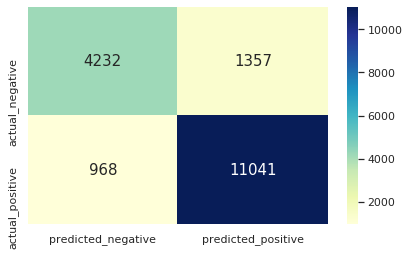

In [48]:
# To mapa de calor para o primeiro modelo de regressão logística
cm1 = conf_matrix(y_test, y_pred_cv1)

In [0]:
# A segunda matriz de termos de documento possui unigramas e bigrams e indicadores em vez de contagens
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

In [0]:
# Treine o segundo modelo
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

0.8811228548698716


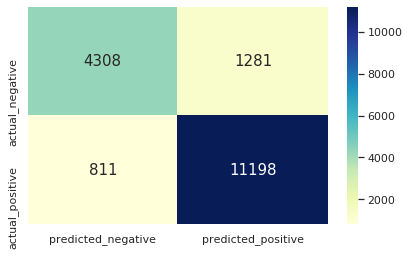

In [57]:
# O mapa de calor para o segundo modelo de regressão logística
cm2 = conf_matrix(y_test, y_pred_cv2)

In [58]:
# Compile todas as métricas de erro em um quadro de dados para comparação
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

,LogReg1,LogReg2
Accuracy,0.868,0.881
Precision,0.891,0.897
Recall,0.919,0.932
F1 Score,0.905,0.914


In [0]:
# Ajuste o primeiro modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [0]:
# Ajuste o segundo modelo Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

0.8466871235367656


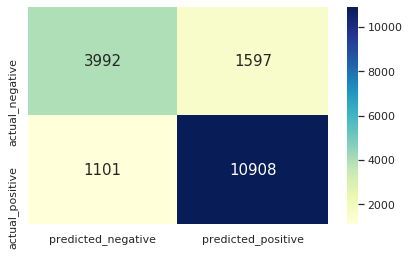

In [61]:
# Aqui está o mapa de calor para o primeiro modelo Naive Bayes
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

0.7028071371746789


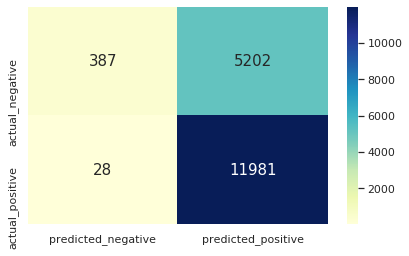

In [62]:
# Aqui está o mapa de calor para o segundo modelo Naive Bayes
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

In [63]:
# Compile todas as métricas de erro em um quadro de dados para comparação
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1', 'NB2']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,LogReg2,NB1,NB2
Accuracy,0.868,0.881,0.847,0.703
Precision,0.891,0.897,0.872,0.697
Recall,0.919,0.932,0.908,0.998
F1 Score,0.905,0.914,0.890,0.821


In [65]:
df['review']

11        one boy needed lose weight put food floor chubby guy protein rich product food higher skinny boy jump higher food sits going stale really go food chubby boy losing ounce week                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
14        strawberry twizzlers guilty pleasure yummy six pound around son                                                                                                                                                                                                        

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [68]:
df['tokens']=df.review.map(word_tokenize)
df['tokens']

11        [one, boy, needed, lose, weight, put, food, floor, chubby, guy, protein, rich, product, food, higher, skinny, boy, jump, higher, food, sits, going, stale, really, go, food, chubby, boy, losing, ounce, week]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
14        [strawberry, twizzlers, guilty, pleasure, yummy, six, pound, around, son]                                                                                                                                        

In [0]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df.tokens.tolist(),[])

In [72]:
word_list_clean[:10]

['one',
 'boy',
 'needed',
 'lose',
 'weight',
 'put',
 'food',
 'floor',
 'chubby',
 'guy']

In [73]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(31121, 'like'),
 (27258, 'product'),
 (25739, 'taste'),
 (24319, 'one'),
 (21739, 'good'),
 (18915, 'flavor'),
 (18588, 'food'),
 (18222, 'tea'),
 (16466, 'great'),
 (15803, 'coffee')]

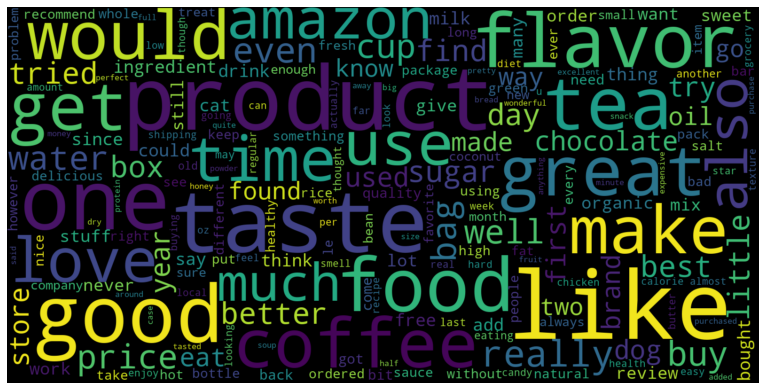

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
df['sentiment'].value_counts()

1    40340
0    18318
Name: sentiment, dtype: int64

In [85]:
word_list_clean_dislikes=sum(df[df['sentiment']==0]['tokens'].tolist(),[])
word_list_clean_dislikes[:10]

['oatmeal',
 'good',
 'mushy',
 'soft',
 'like',
 'quaker',
 'oat',
 'way',
 'go',
 'seriously']

In [87]:
# Converte a lista em um dicionário com contagem de valores
word_counts_clean_dislikes = Counter(word_list_clean_dislikes)
a_dislikes = word_counts_clean_dislikes

# Inverta a chave / valores no dicionário para classificar
word_counts_clean_dislikes = list(zip(word_counts_clean_dislikes.values(), word_counts_clean_dislikes.keys()))

# Classifique a lista por contagem
word_counts_clean_dislikes = sorted(word_counts_clean_dislikes, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean_dislikes[:10]

[(11180, 'product'),
 (9471, 'like'),
 (8207, 'taste'),
 (7144, 'one'),
 (6023, 'would'),
 (5520, 'food'),
 (4906, 'good'),
 (4550, 'flavor'),
 (4332, 'coffee'),
 (4314, 'amazon')]

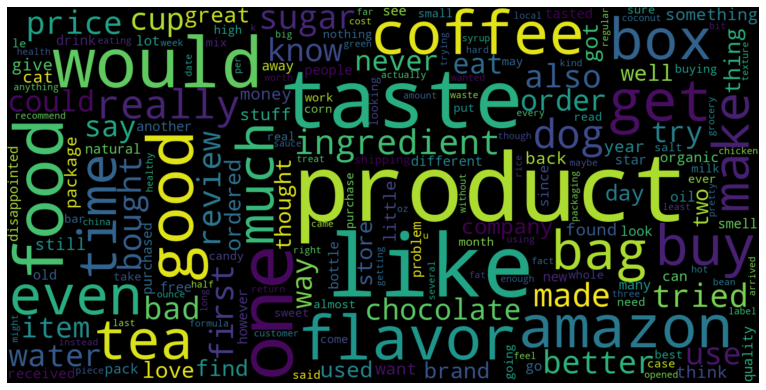

In [89]:
text_dislikes = word_list_clean_dislikes
wordcloud_dislikes = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a_dislikes)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_dislikes, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
word_list_clean_likes=sum(df[df['sentiment']==1]['tokens'].tolist(),[])
word_list_clean_likes[:10]

['one',
 'boy',
 'needed',
 'lose',
 'weight',
 'put',
 'food',
 'floor',
 'chubby',
 'guy']

In [88]:
# Converte a lista em um dicionário com contagem de valores
word_counts_clean_likes = Counter(word_list_clean_likes)
a_likes = word_counts_clean_likes

# Inverta a chave / valores no dicionário para classificar
word_counts_clean_likes = list(zip(word_counts_clean_likes.values(), word_counts_clean_likes.keys()))

# Classifique a lista por contagem
word_counts_clean_likes = sorted(word_counts_clean_likes, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean_likes[:10]

[(21650, 'like'),
 (17532, 'taste'),
 (17175, 'one'),
 (16833, 'good'),
 (16078, 'product'),
 (14533, 'tea'),
 (14459, 'great'),
 (14365, 'flavor'),
 (13068, 'food'),
 (11848, 'make')]

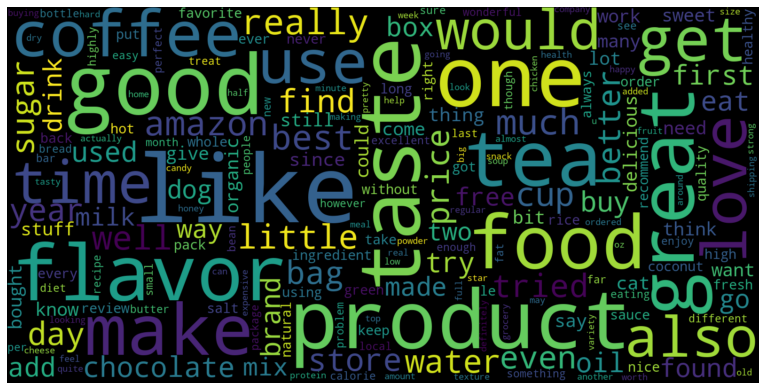

In [90]:
text_likes = word_list_clean_likes
wordcloud_likes = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a_likes)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis("off")
plt.show()